<a href="https://colab.research.google.com/github/BrandonOuyang123/Decathlon-Assignment/blob/main/Decathlon_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

In [3]:
#https://rive.google.com/file/d/1cvY-jL3DYMHPqKJCdFe_AhuC7VA2FlHg/view?usp=drive_link
file_id = '1cvY-jL3DYMHPqKJCdFe_AhuC7VA2FlHg'
url = f'https://drive.google.com/uc?id={file_id}'
#://drive.google.com/file/d/15zTmcxGC9DMQ5Lo0GZLYOoD8-GwXNz87/view?usp=drive_link
output = 'Decathlon.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv('Decathlon.csv')


Downloading...
From (original): https://drive.google.com/uc?id=1cvY-jL3DYMHPqKJCdFe_AhuC7VA2FlHg
From (redirected): https://drive.google.com/uc?id=1cvY-jL3DYMHPqKJCdFe_AhuC7VA2FlHg&confirm=t&uuid=bbdfa2fb-536a-4459-9127-b5c0c9c5a47e
To: /content/Decathlon.csv
100%|██████████| 764M/764M [00:07<00:00, 109MB/s]


Overview of data

In [4]:
df.head()

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


In [5]:

df['member'] = df['ctm_customer_id'].apply(lambda x: 0 if pd.isna(x) else 1)
df['basket_size'] = df.groupby(['the_transaction_id','but_name_business_unit','member'])['f_qty_item'].transform("sum")
df['total_price'] = df['f_qty_item'] * df['f_to_tax_in']
df['basket_value'] = df.groupby(['the_transaction_id','but_name_business_unit','member'])['total_price'].transform("sum")
df1 = df[['but_name_business_unit','member','basket_size','basket_value']].drop_duplicates()
df1 = df1[(df1['basket_value'] != 0) | (df1['basket_size'] != 0)]
df1.groupby(['but_name_business_unit','member']).mean()


basket_size  basket_value
but_name_business_unit    member                           
Bedok SG                  0         17.545739   1113.318994
                          1         20.769655   1318.212556
Centre Point              0         15.659148    959.069169
                          1         17.900971   1105.737927
Chinatown Point           0          7.696495    488.614470
                          1          8.173677    501.703181
City Square SG            0         16.168683   1022.234115
                          1         18.029986   1138.234393
Decathlon Holland Village 0          9.274795    618.513895
                          1         10.147290    668.693666
Decathlon Velocity        0          9.283717    588.819962
                          1          9.940299    628.294204
Joo Koon                  0         17.369749   1065.570872
                          1         21.237818   1300.473580
Singapore Lab             0         18.617992   1183.050419
                          1         22.202689   1398.504891
SunPlaza                  0          8.951145    580.935621
                          1          9.231227    590.714681
Tampines Mall             0          9.533594    597.467134
                          1         10.193522    634.718951
Tiong Bahru Plaza         0          7.684249    472.265742
                          1          8.064042    490.023012
Waterway Point            0          8.118971    531.141255
                          1          9.438540    606.849522
Website                   0         10.183084    695.403747
                          1         16.775060   1313.080409

Distribution of basket size

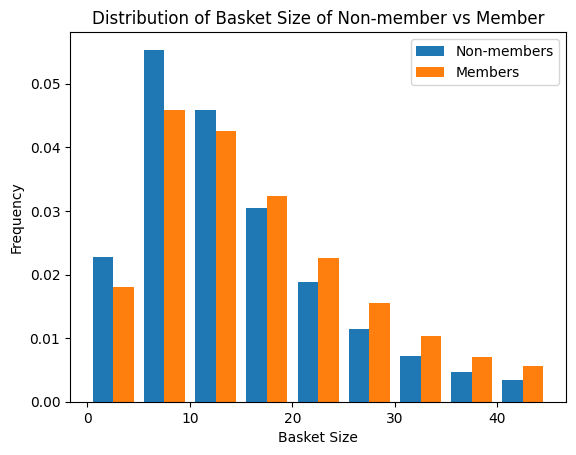

In [6]:
basket_sizes_member_0 = df1[df1['member'] == 0]['basket_size'].values
basket_sizes_member_1 = df1[df1['member'] == 1]['basket_size'].values

# Create the histogram
plt.hist([basket_sizes_member_0, basket_sizes_member_1],
         bins = range(0,50,5),
         label=['Non-members', 'Members'], density = True)
plt.legend()
plt.xlabel('Basket Size')
plt.ylabel('Frequency')
plt.title('Distribution of Basket Size of Non-member vs Member')
plt.show()

Distribution of basket value

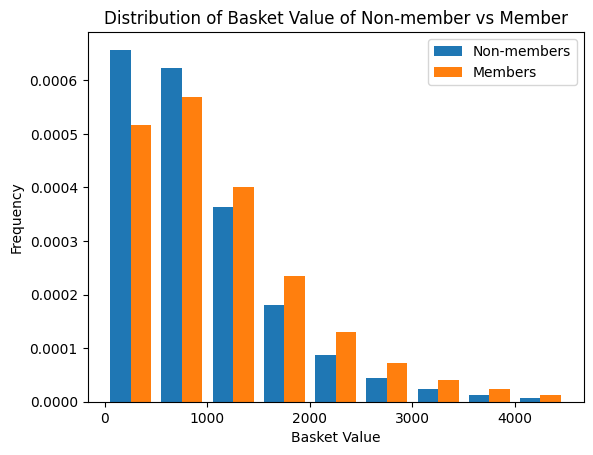

In [7]:
basket_sizes_member_0 = df1[df1['member'] == 0]['basket_value'].values
basket_sizes_member_1 = df1[df1['member'] == 1]['basket_value'].values

# Create the histogram
plt.hist([basket_sizes_member_0, basket_sizes_member_1],
         bins = range(0,5000,500),
         label=['Non-members', 'Members'], density = True)
plt.legend()
plt.xlabel('Basket Value')
plt.ylabel('Frequency')
plt.title('Distribution of Basket Value of Non-member vs Member')
plt.show()

Q2

In [53]:
df["channel"] = np.select(
    [
        df["but_name_business_unit"].isin(["Bedok SG", "City Square SG", "Joo Koon", "Singapore Lab", "Centre Point"]),
        df["but_name_business_unit"] == "Website"
    ],
    [
        "Experience",
        "Online"
    ],
    default="C&C"
)

df1 = df[df["member"] == 1][['ctm_customer_id','channel']].drop_duplicates()
df1 = df1.pivot(index='ctm_customer_id', columns='channel', values='channel').fillna("")
df1["channel"] = df1[["Experience", "Online", "C&C"]].apply(lambda x: " ".join(x), axis=1)
(df1.groupby('channel').count()/len(df1))['C&C']

,C&C
channel,
C&C,0.091482
Online,0.172503
Online C&C,0.024342
Experience,0.525195
Experience C&C,0.070151
Experience Online,0.088104
Experience Online C&C,0.028223


Q3

<ipython-input-66-9b67ea124b63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3["date_time"] = pd.to_datetime(df_q3["the_date_transaction"]).dt.hour


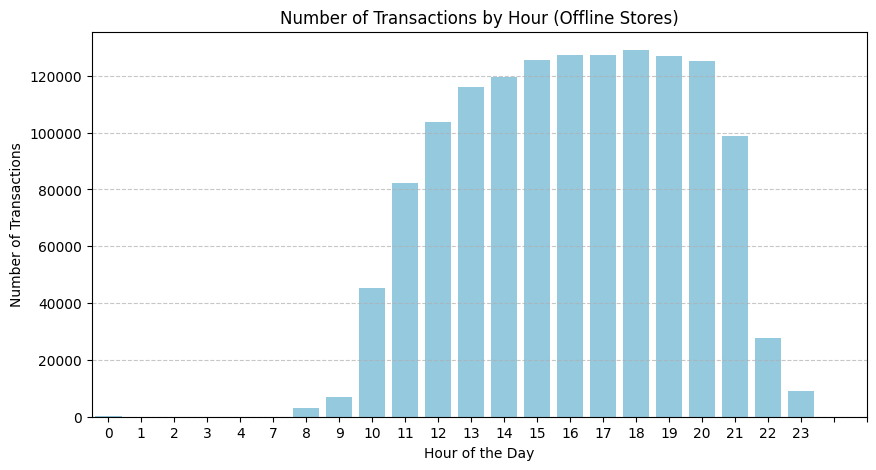

In [66]:
df_q3 = df[df["the_to_type"] == "offline"]
df_q3["date_time"] = pd.to_datetime(df_q3["the_date_transaction"]).dt.hour
df_q3 = df_q3[["date_time", "the_transaction_id"]].drop_duplicates()

df_hour = df_q3.groupby("date_time").size().reset_index(name="n")
plt.figure(figsize=(10,5))
sns.barplot(x="date_time", y="n", data=df_hour, color="skyblue")

plt.title("Number of Transactions by Hour (Offline Stores)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<ipython-input-75-e942911548d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qty["date_time"] = pd.to_datetime(df_qty["the_date_transaction"]).dt.hour
<ipython-input-75-e942911548d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qty['qty_sold'] = df_qty.groupby(['the_transaction_id','date_time'])['f_qty_item'].transform("sum")


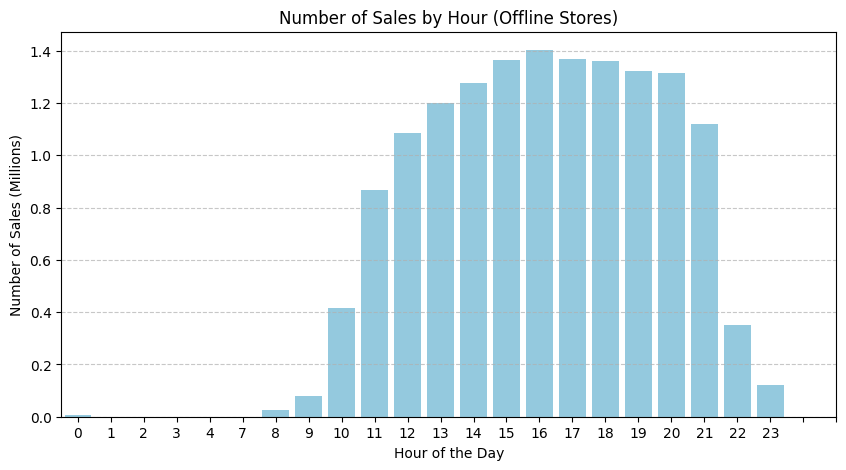

In [75]:
df_qty = df[df["the_to_type"] == "offline"]
df_qty["date_time"] = pd.to_datetime(df_qty["the_date_transaction"]).dt.hour
df_qty['qty_sold'] = df_qty.groupby(['the_transaction_id','date_time'])['f_qty_item'].transform("sum")
df_qty = df_qty[["date_time", "qty_sold","the_transaction_id"]].drop_duplicates()
df_agg = df_qty.groupby("date_time")['qty_sold'].sum().reset_index()
df_agg['qty_sold'] = df_agg['qty_sold']/1000000
plt.figure(figsize=(10,5))
sns.barplot(x="date_time", y="qty_sold", data=df_agg, color="skyblue")

plt.title("Number of Sales by Hour (Offline Stores)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sales (Millions)")
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()